In [48]:
#source & inspired 
#from https://www.kaggle.com/code/hugosjoberg/house-prices-prediction-using-keras
#from https://www.kaggle.com/code/gusthema/house-prices-prediction-using-tfdf/notebook
#
#
#-----------------------------------------
#Import & Select Data Process
import csv
import pandas as pd
#import file for evaluation process
#require matplotlib,tensorflow,sklearn
import matplotlib.pyplot as plt
from tensorflow.python.keras import Input
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.metrics import median_absolute_error, mean_absolute_percentage_error
from numpy import arange
import seaborn as sns

In [49]:
#import data
data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
#drop ID
df = data.drop("Id", axis=1)
print(df.isna().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


In [50]:
#find the mean of the price
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

e:\Program shit\New folder\envs\Newplace\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


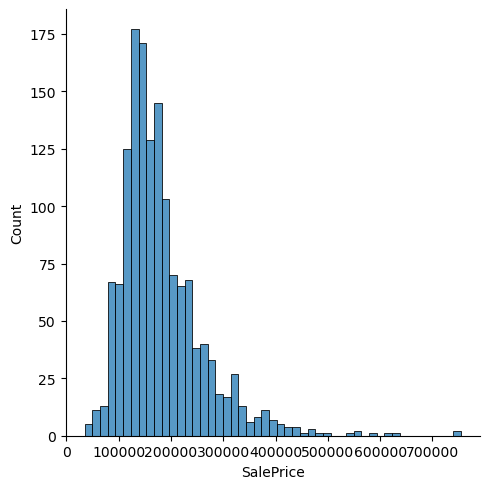

In [51]:
#make a picture(visualize) out of it
sns.displot(df["SalePrice"])

In [52]:
#select only integer and float variable
df_num = df.select_dtypes(include=["float64","int64"])
df_num.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500


<Axes: >

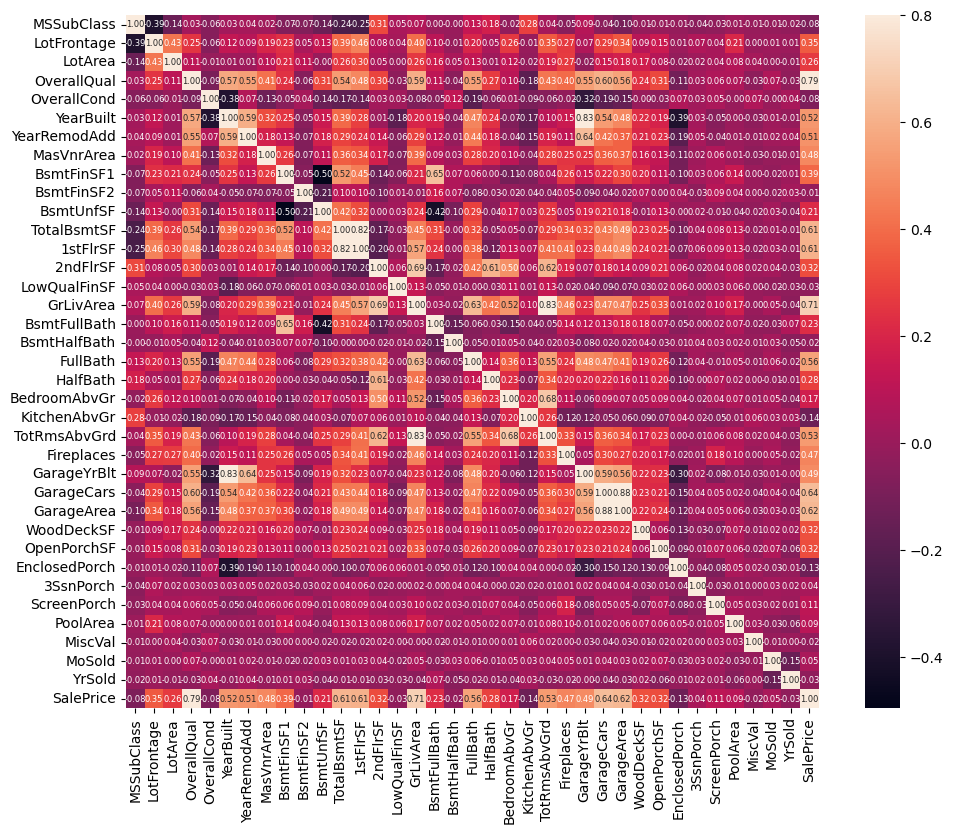

In [57]:
#try to find the important-related column to the price through heat map
corrmat = df_num.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8,annot=True, square=True,fmt='.2f',annot_kws={'size': 6})

In [59]:
#Cleaning Process
#finding the total missing value
total = df_num.isnull().sum().sort_values(ascending=False)
percent = (df_num.isnull().sum()/df_num.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
OpenPorchSF,0,0.000000
KitchenAbvGr,0,0.000000
TotRmsAbvGrd,0,0.000000
Fireplaces,0,0.000000
GarageCars,0,0.000000
GarageArea,0,0.000000
WoodDeckSF,0,0.000000


In [60]:
#select a data for the new dataframe by using above heatmap as reference point
#will pick something above 0.5 - 0.6 and totalbsmtsf2 and 1stflrsf
data_train = df_num[["OverallQual","GrLiveArea","GarageCars","FullBath","TotalBsmtSF2","YeahBuild"]]

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "e:\Program shit\New folder\envs\Newplace\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Powernet\AppData\Local\Temp\ipykernel_7880\2765929412.py", line 3, in <module>
    data_train = df_num[["OverallQual","GrLiveArea","GarageCars","FullBath","TotalBsmtSF2","YeahBuild"]]
  File "e:\Program shit\New folder\envs\Newplace\lib\site-packages\pandas\core\frame.py", line 3767, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
  File "e:\Program shit\New folder\envs\Newplace\lib\site-packages\pandas\core\indexes\base.py", line 5876, in _get_indexer_strict
  File "e:\Program shit\New folder\envs\Newplace\lib\site-packages\pandas\core\indexes\base.py", line 5938, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "['GrLiveArea', 'TotalBsmtSF2', 'YeahBuild'] not in index"

During ha

In [ ]:
#replace missing value with mean

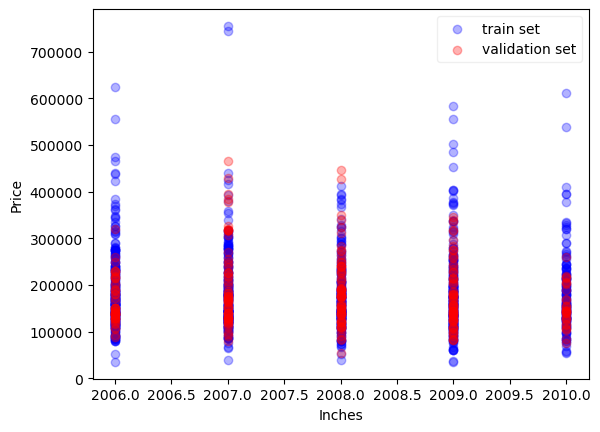

In [15]:
# Split dataset into train and validation(visualize):
def split_dataset(df_num, train_frac=0.7):
 train = df_num.sample(frac=train_frac)
 val = df_num.drop(train.index)
 return train, val

#
train_1, validation_1 = split_dataset(df_num, train_frac=0.8)
plt.scatter(train_1['YrSold'].astype(int), train_1['SalePrice'].astype(int), c='blue', alpha=0.3)
plt.scatter(validation_1['YrSold'].astype(int), validation_1['SalePrice'].astype(int), c='red', alpha=0.3)
plt.xlabel('Inches')
plt.ylabel('Price')
plt.legend(['train set', 'validation set'], framealpha=0.3)
plt.show()

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

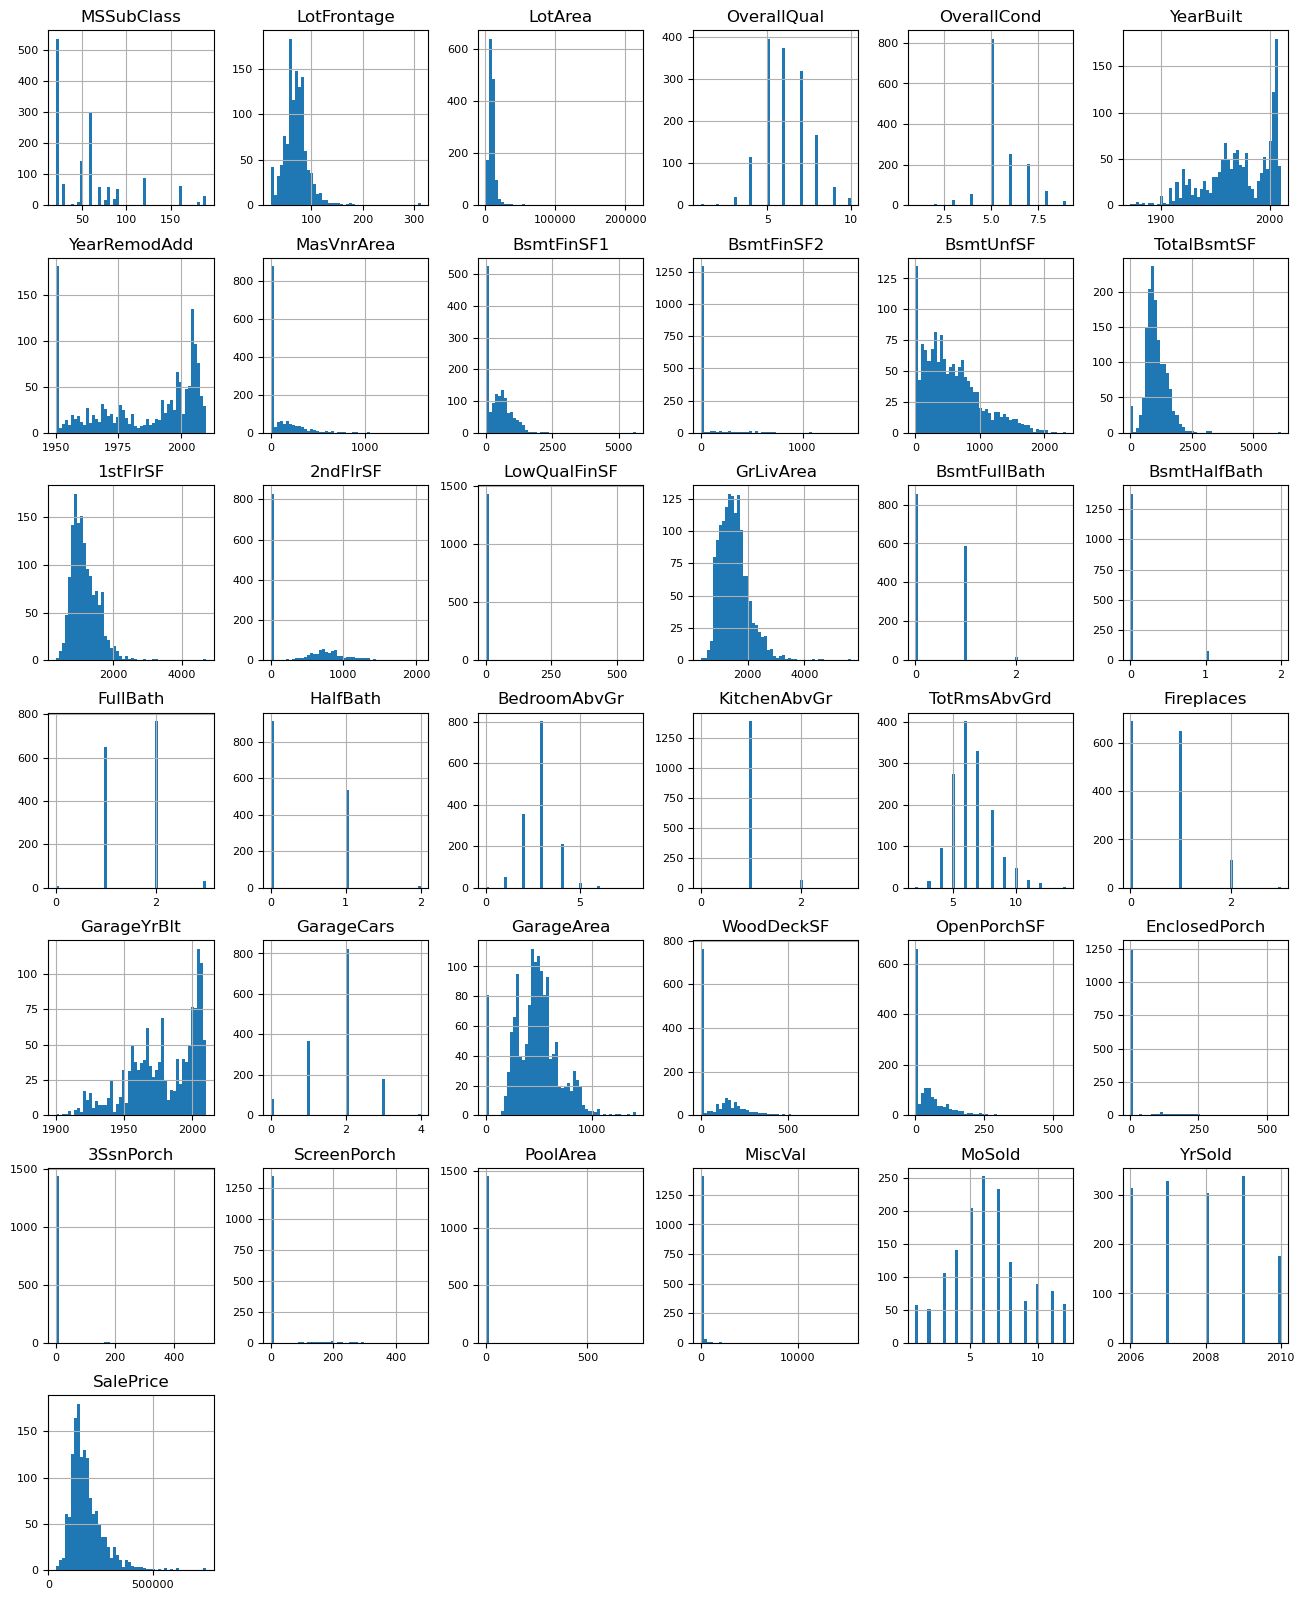

In [11]:
#visualize df_num just only the var that have int and float value
df_num.hist(figsize=(16,20),bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
# Create model:
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(1, activation='linear'))
print(model.summary())

In [ ]:
#Evaluation Process

# Train:
loss = 'mse'
metric = 'mae'
#accurate epoch is 1750 but due to low CPU use low Epochs
epochs = 500

x_train, y_train = train_1['x'], train_1['y']
x_val, y_val = validation_1['x'], validation_1['y']
model.compile(loss=loss, optimizer='adam', metrics=[metric])
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, verbose=1, validation_data=(x_val, y_val))
#

In [ ]:
predictions = model.predict(new)
print(predictions)